<a href="https://colab.research.google.com/github/ryar001/tester/blob/master/portfolio_optimise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting and setting directory


In [ ]:
# mounting the google drive 
# set the dirrectory to the location i wanted
# relative path so shld work
# since the cwd is now set to the this folder, we can import item from there
from google.colab import drive
drive.mount('/content/drive')
%cd './drive/My Drive/Colab Notebooks'


# add a path to '/content/drive/My Drive/My python files/lib'
# as i store the self use py files
import sys
sys.path.append(str(Path(Path.cwd().parent,'My python files/lib')))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
#cloning of desired git to the CWD
!git clone https://github.com/ryar001/tester.git


Cloning into 'tester'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
from pathlib import Path
Path(Path.cwd().parent,'My python files/lib')

PosixPath('/content/drive/My Drive/My python files/lib')

# Check dir 


In [ ]:
# check cwd dir
!ls

 asd.py       'Copy of Snippets: Importing libraries'   __pycache__
 Company_csv  'portfolio optimise.ipynb'	        tester


In [ ]:
# check cwd
import pathlib
from pathlib import Path


PosixPath('/content/drive/My Drive/Colab Notebooks')

In [ ]:
# check sys path,the dir which py look for modules
sys.path

['./content/drive/My Drive/My python files/lib',
 '',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 './content/drive/My Drive/My python files/lib',
 '/content/drive/My Drive/My python files/lib']

In [ ]:
# test if it works
import stock_get

# Imports


In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# make portfolio

In [ ]:
# FAANG stocks
assets=['FB','AAPL','AMZN','GOOGL','NFLX']


In [ ]:
#ASSIGN weights
weights=np.full(5,0.2)

In [ ]:
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
#get start date
startDate='2013-01-01'


In [ ]:
# end date
today=datetime.today().strftime('%Y-%m-%d')

In [ ]:
#create df to store close price
df =pd.DataFrame()
for stock in assets:
  df[stock]=web.DataReader(stock,start=startDate,end=today,data_source= "yahoo")['Adj Close']

In [ ]:
df

Text(0, 0.5, 'USD')

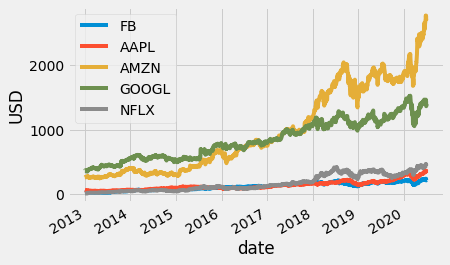

In [ ]:
#show stock
df.plot()
plt.xlabel("date")
plt.ylabel('USD')

In [65]:
returns=df.pct_change()

In [67]:
# create annualise covariance matrix
# The diaganal shos variance, the variance sq^2 == S.D == risk
# +ve covariance show the 2 assest move together
# -ve is inverse relation 
covMatrixAnnual=returns.cov()*252
covMatrixAnnual

,FB,AAPL,AMZN,GOOGL,NFLX
FB,0.116732,0.041216,0.051981,0.049372,0.054305
AAPL,0.041216,0.076643,0.035753,0.037479,0.032070
AMZN,0.051981,0.035753,0.091320,0.046332,0.060950
GOOGL,0.049372,0.037479,0.046332,0.064656,0.048468
NFLX,0.054305,0.032070,0.060950,0.048468,0.211998


In [ ]:
w

In [70]:
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [69]:
# cal portfolio variance
portVariance=np.dot(weights.T,np.dot(covMatrixAnnual,weights))
portVariance

0.059088143839763504

In [77]:
# Sd is the sqrt of the variance
# sd is the risk too
portSD=np.sqrt(portVariance)
portSD

0.24308052953653755

In [79]:
returns.mean()

FB       0.001324
AAPL     0.001036
AMZN     0.001424
GOOGL    0.000844
NFLX     0.002278
dtype: float64

In [80]:
#cal annual port returns
# we get the average returns daily of each share 
# then we multiple it by its weights, * 252 trading days
portfolioSimpleAnnualReturn=np.sum(returns.mean()*weights)*252

In [82]:
portfolioSimpleAnnualReturn

0.348098334690012

In [84]:
#show the expected annual return, volatility, variance
percent_Var=str(round(portVariance,2)*100)+"%"
percent_Vols=str(round(portSD,2)*100)+'%'
percent_Rets=str(round(portfolioSimpleAnnualReturn,2)*100)+'%'

In [85]:
 print('expected ret: ',percent_Rets)
 print('expected_vols: ',percent_Vols)
 print('expected Var: ',percent_Var)

expected ret:  35.0%
expected_vols:  24.0%
expected Var:  6.0%


# Portfolio optimise


In [86]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.5MB/s 


In [89]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [92]:
# cal expt rets and annual sample cov 
# mu == cal annualise mean returns from daily
mu =expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

In [103]:
# opti for max sharpe
# EfficientFrontier will optimise base on various diff method
# we now try max the sharpe
ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()

#this will remove any weights below cutoff e.g 0.0001
# then roudn the rest
cleaned_weights = ef.clean_weights()
print(cleaned_weights,'\n')

#portfolio perf
# verbose default false
# verbose true to print immediately
x=ef.portfolio_performance(verbose=True)

print("if verbose == False: ",x)

OrderedDict([('FB', 0.12722), ('AAPL', 0.23649), ('AMZN', 0.30564), ('GOOGL', 0.0), ('NFLX', 0.33065)]) 

Expected annual return: 40.4%
Annual volatility: 26.7%
Sharpe Ratio: 1.44
if verbose == False:  (0.4037190464001343, 0.26735557705172874, 1.4352386085661912)


In [108]:
 print('expected ret: ',percent_Rets)
 print('expected vols: ',percent_Vols)
 print('expected Var: ',percent_Var)
 #print('expected sharpe: ',portfolioSimpleAnnualReturn/portSD^2)

expected ret:  35.0%
expected vols:  24.0%
expected Var:  6.0%


# Discrete alloc

In [109]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices,  total_portfolio_value=10000)
allocation,leftover=da.lp_portfolio()


In [114]:
print('Discrete alloc: ', allocation)
print('funds remainom: ${:.2f}'.format(leftover))

Discrete alloc:  {'FB': 5.0, 'AAPL': 7.0, 'AMZN': 1.0, 'NFLX': 8.0}
funds remainom: $106.04
